In [1]:
#import necessary packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats
set_config(display='diagram')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Maryam/100 Days of ML/toy_dataset.csv")
df.sample(6)

,Number,City,Gender,Age,Income,Illness
98060,98061,Los Angeles,Male,57,102182.0,No
50475,50476,New York City,Female,53,91021.0,No
19105,19106,Dallas,Female,61,42090.0,No
55154,55155,New York City,Female,28,86704.0,No
125092,125093,Washington D.C.,Male,47,68707.0,No
25403,25404,New York City,Female,51,102170.0,No


In [67]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [68]:
df.drop(df[df['Income']==-654.000000].index,inplace=True)


In [69]:
df.drop(columns='Number', axis=1, inplace=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:4], df.iloc[:, -1], test_size=0.3, random_state=42)

In [86]:
df.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


In [87]:
df.City.unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [88]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [89]:
X_train.head()

,City,Gender,Age,Income
27823,New York City,Male,30,99719.0
85203,Los Angeles,Female,38,88548.0
42218,New York City,Female,38,67135.0
119959,Boston,Female,35,86679.0
37679,New York City,Female,52,80959.0


In [90]:
OHE ---> city and gender
Scaling ---> age and income


SyntaxError: invalid syntax (1279694749.py, line 1)

In [100]:
trf1 = ColumnTransformer([
    ('OHE', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', dtype=int),[0,1])
], remainder='passthrough')

In [101]:
trf2 = ColumnTransformer([
    ('scaling', StandardScaler(), slice(0,10) )
])

In [102]:
trf3 = ColumnTransformer([('log',FunctionTransformer(np.log1p),[2,3])],remainder='passthrough')


In [103]:
trf4 = LogisticRegression()

In [104]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4)
])

In [105]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  slice(0, 10, None))])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [2, 3])])),
                ('trf4', LogisticRegression())])

In [106]:
y_pred = pipe.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.9166444444444445

C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


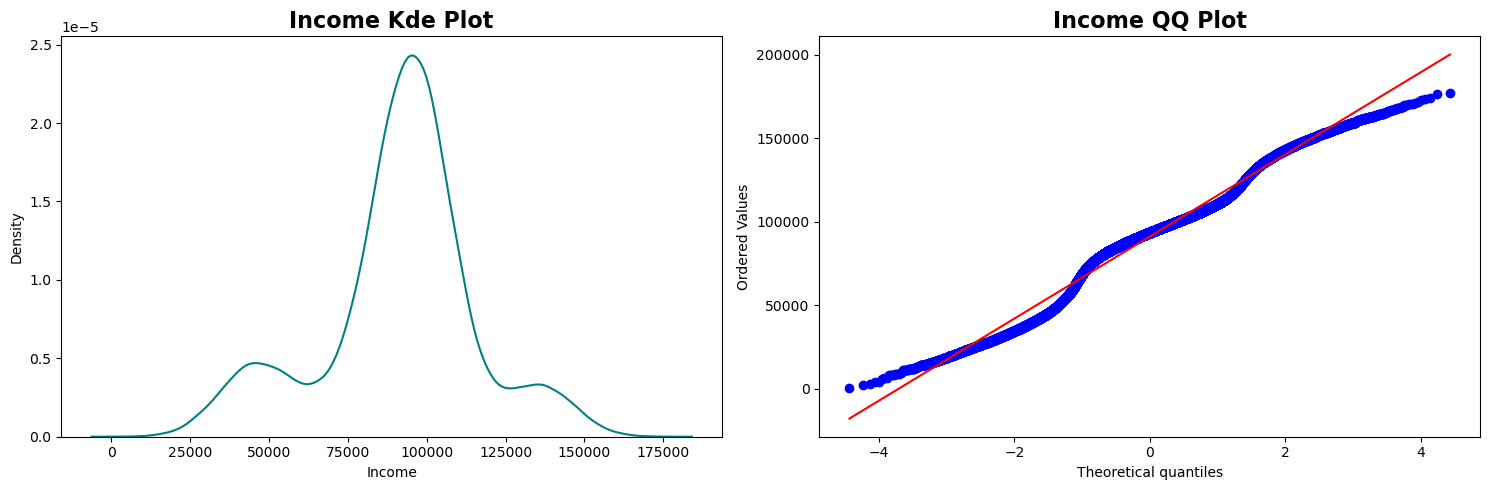

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(df['Income'], ax=ax[0],color='teal')
ax[0].set_title('Income Kde Plot', weight='bold', fontsize=16)

stats.probplot(df['Income'], dist='norm', plot=ax[1])
ax[1].set_title('Income QQ Plot', weight='bold', fontsize=16)

plt.tight_layout()
plt.show()

In [84]:
print(df['Age'].skew())
print(df['Income'].kurt())

0.005357118125884902
0.5198493485535902


C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


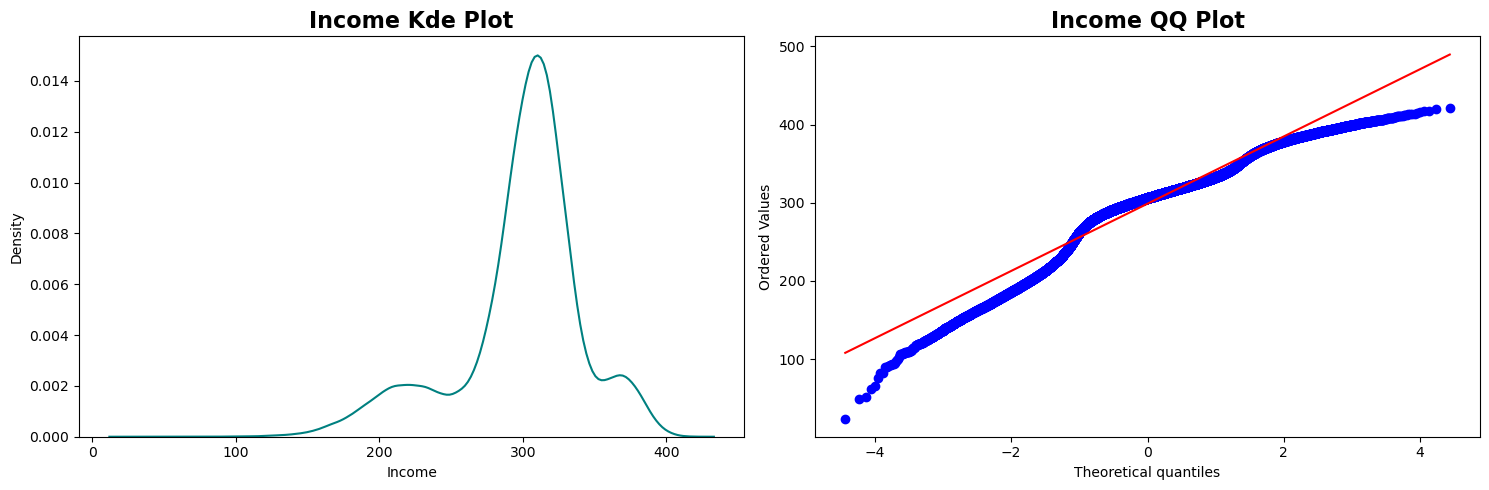

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(np.sqrt(df['Income']), ax=ax[0],color='teal')
ax[0].set_title('Income Kde Plot', weight='bold', fontsize=16)

stats.probplot(np.sqrt(df['Income']), dist='norm', plot=ax[1])
ax[1].set_title('Income QQ Plot', weight='bold', fontsize=16)

plt.tight_layout()
plt.show()

In [59]:
df['Income'].min()

584.0

In [64]:
df.head()

,index,City,Gender,Age,Income,Illness
0,0,Dallas,Male,41,40367.0,No
1,1,Dallas,Male,54,45084.0,No
2,2,Dallas,Male,42,52483.0,No
3,3,Dallas,Male,40,40941.0,No
4,4,Dallas,Male,46,50289.0,No


<Axes: ylabel='Frequency'>

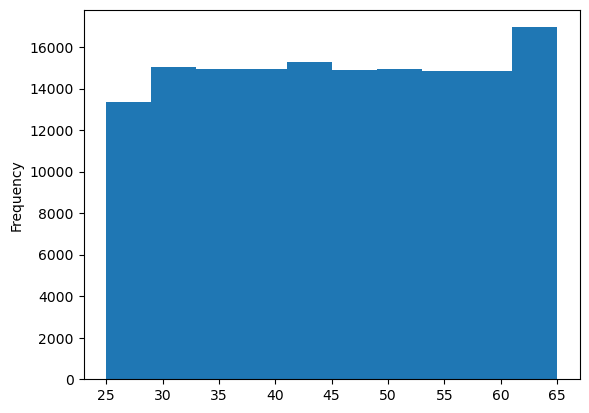

In [5]:
df['Age'].plot(kind='hist')

C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

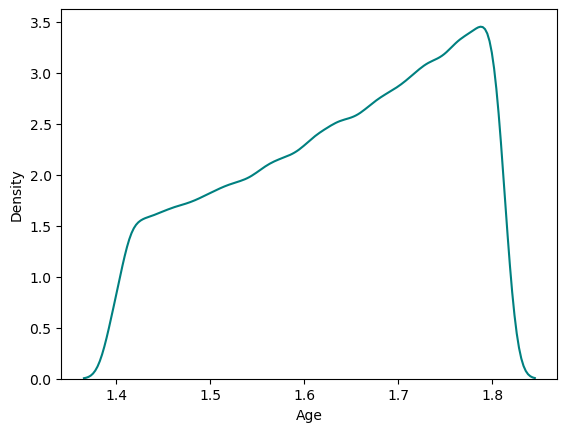

In [11]:
sns.kdeplot(np.log10(df['Age']),color='teal')


### `log transformer used for right skewed data`

### `square transformer used for left skewed data`

C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


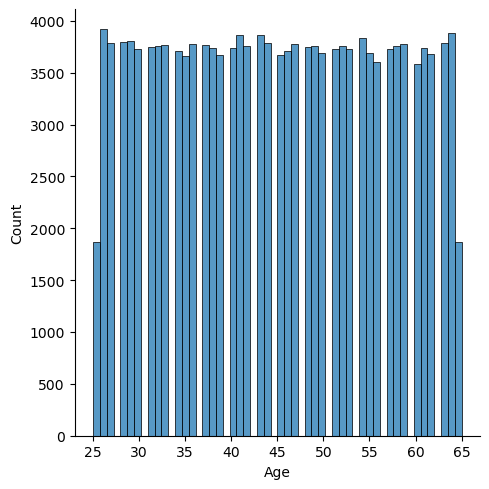

In [12]:
sns.displot(df['Age'])